# Image Classifying Algorithm

In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-01-03 18:10:06.404084: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-03 18:10:06.706336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 18:10:06.706386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 18:10:06.756662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 18:10:06.834215: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-03 18:10:06.834964: I tensorflow/core/platform/cpu_feature_guard.cc:1

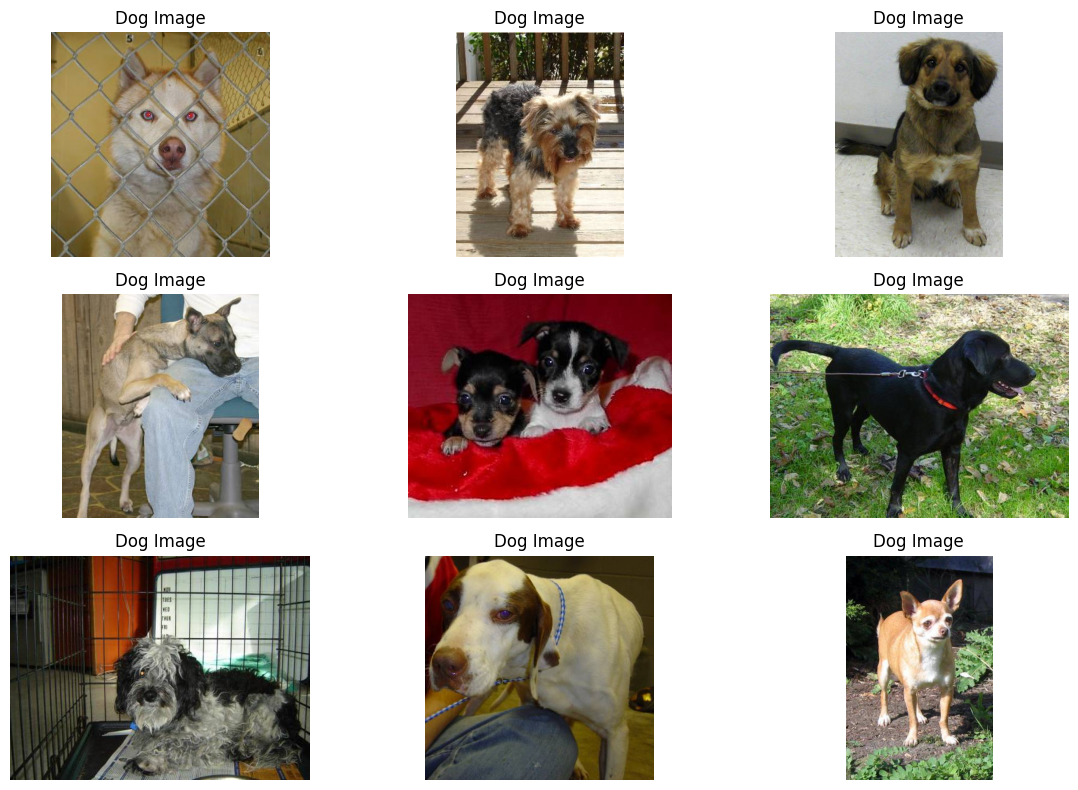

In [2]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "../data/raw"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

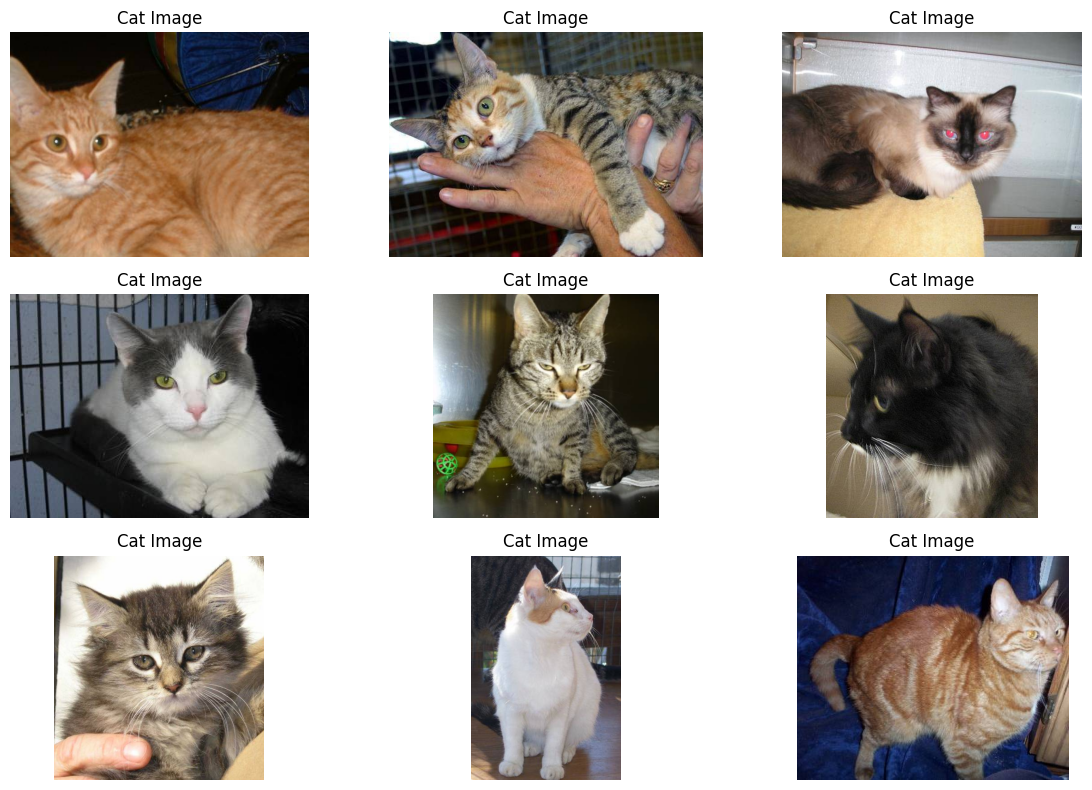

In [3]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "../data/raw/cat"

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, "cat")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

#### Create the Images Data Sets


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test1"] 
)

Found 19622 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


#### Train The Model

In [5]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

2024-01-03 18:10:17.888470: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-03 18:10:18.390882: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-03 18:10:18.429621: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


In [6]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [7]:
# Train the Model
model.fit(train_data, epochs = 1)

2024-01-03 18:10:19.374339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-03 18:10:19.409026: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/vscode/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/local/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_8588/674563058.py", line 2, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,18432], In[1]: [25088,4096]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_train_function_3922]

#### Save our Model to Use it Later

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/vscode/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/local/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_442/674563058.py", line 2, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,18432], In[1]: [25088,4096]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_train_function_3922]

#### Due to GitHub Space constraints, the model will not be inside the models folder
##### Same with the original pictures, they aren't in the repo

In [ ]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

NameError: name 'hist' is not defined

### Try and Predict the Images

OSError: No file or directory found at ../models/vgg16_1.h5

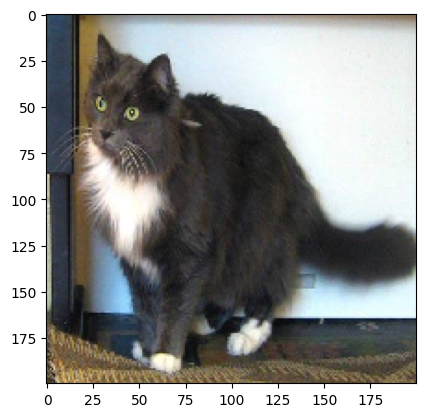

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test1/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")